# 🏠 Real Estate Price Prediction using Linear Regression

<img src = "https://miro.medium.com/1*6FMunSj8yetV9Y35ER3nbQ.jpeg" width = "400">

In this project, we use a **real estate dataset** to explore how **Linear Regression** can be applied to predict **house prices**.  
The dataset contains numerical attributes such as:

- Transaction date  
- House age  
- Distance to the nearest MRT station  
- Number of convenience stores  
- Latitude  
- Longitude  

Our goal is to **predict the house price** based on these features.

### What this notebook demonstrates:
1. Load and inspect the dataset  
2. Prepare features and target variable  
3. Train/test split  
4. Build a Linear Regression model using scikit-learn  
5. Evaluate the model using RMSE and R² score  
6. Visualize actual vs predicted values and residuals  

Linear Regression is suitable for this dataset because:
- The target variable (`price`) is continuous  
- The input features are numerical  
- The relationship between inputs and price can be approximated as linear  


##Dataset Inspection

- Loaded the real estate dataset into a pandas DataFrame for initial exploration.

- Displayed the first few rows using head() to understand the structure and sample values.

- sed info() to review column types, non-null counts, and overall dataset structure.

- Generated summary statistics with describe() to examine distributions, central tendencies, and potential anomalies in numerical features.

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/INDE 577 github Jupyter files/Supervised Learning/Gradient Descent/Real-estate-dataset.csv")

# Inspect data
print(df.head())
print(df.info())
print(df.describe())

   price  No  X1 transaction date  X2 house age  \
0   37.9   1             2012.917          32.0   
1   42.2   2             2012.917          19.5   
2   47.3   3             2013.583          13.3   
3   54.8   4             2013.500          13.3   
4   43.1   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  
0     24.98298     121.54024  
1     24.98034     121.53951  
2     24.98746     121.54391  
3     24.98746     121.54391  
4     24.97937     121.54245  
<class 'pandas.core.frame.DataFrame'>


##Feature Selection and Target Variable
We remove the "No" column because it is only an index and does not help prediction.  
Next, we separate:
- "price"
 → target variable (y)
- remaining columns → features (X)

In [ ]:
# Remove index column
df = df.drop(columns=["No"])

# Define target and features
y = df["price"]
X = df.drop(columns=["price"])

print("Features:")
display(X.head())

print("\nTarget:")
display(y.head())

Features:


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245



Target:


,price
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


##Train/Test Split
To evaluate model performance, we split the dataset into two parts:
- **Training set** → used to learn the model
- **Test set** → used only for evaluation to check generalization

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))


Training samples: 331
Test samples: 83


##Train the Model
We use scikit-learn's `LinearRegression` model to learn the relationship
between features and house prices. The model finds coefficients (weights)
for each feature and an intercept term (bias).

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Intercept:", lin_reg.intercept_)
print("Coefficients:")
for feature_name, coef in zip(X.columns, lin_reg.coef_):
    print(f"{feature_name}: {coef:.4f}")


Intercept: -13044.231917160534
Coefficients:
X1 transaction date: 5.4407
X2 house age: -0.2708
X3 distance to the nearest MRT station: -0.0048
X4 number of convenience stores: 1.0914
X5 latitude: 229.0431
X6 longitude: -29.4926


## Model Evaluation
We evaluate the model using:
- RMSE (Root Mean Squared Error): average prediction error
- R² score: how much of the price variation is explained by the model

Then we visualize:
- Predicted vs actual prices
- Residuals (errors of prediction)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.3f}")


RMSE: 7.31
R² score: 0.681


## Visualization: Actual vs Predicted

- Creates a scatter plot comparing actual house prices (y_test) with the model’s predicted values (y_pred).

- Includes a red diagonal reference line representing perfect prediction for visual comparison.

- Uses transparency to improve clarity when points overlap.

- Adds axis labels, title, legend, gridlines, and tight layout formatting for readability.

- Helps evaluate how closely the model’s predictions match the true values.

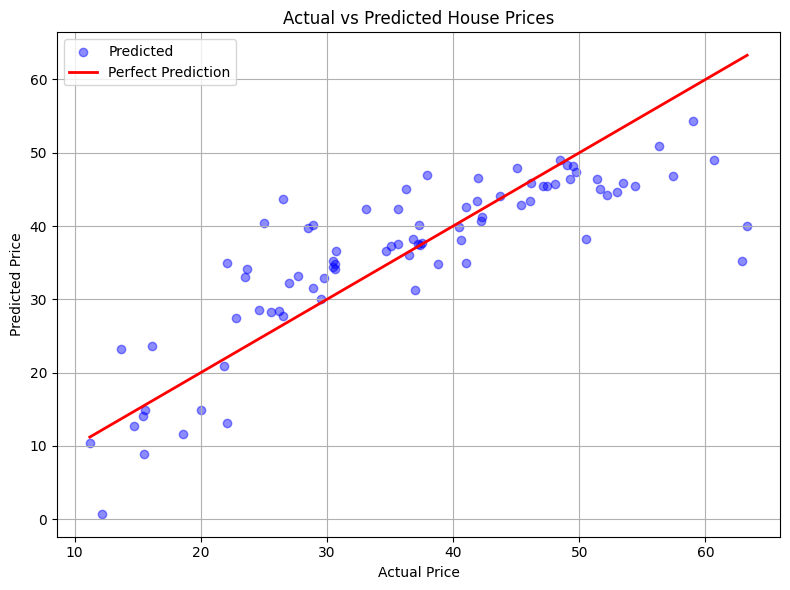

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.45, color="blue", label="Predicted")
    plt.plot(
        [y_true.min(), y_true.max()],
        [y_true.min(), y_true.max()],
        color="red",
        linewidth=2,
        label="Perfect Prediction"
    )
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Actual vs Predicted House Prices")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(y_test, y_pred)


## Visualization: Residual Plot

- Computes residuals as the difference between actual and predicted values.

- Plots residuals against predicted prices to visualize error patterns.

- Includes a horizontal reference line at zero to highlight positive and negative deviations.

- Uses transparency for clearer visualization when points overlap.

- Adds axis labels, title, gridlines, and tight layout formatting for readability.

- Helps identify issues such as bias, non-linearity, or heteroscedasticity in the model’s predictions.

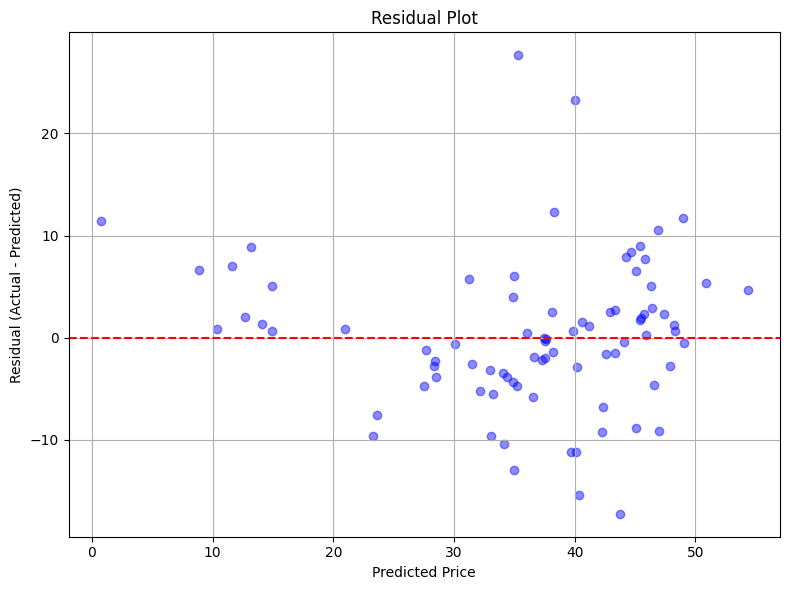

In [ ]:
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.45, color="blue")
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Predicted Price")
    plt.ylabel("Residual (Actual - Predicted)")
    plt.title("Residual Plot")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, y_pred)


## Final Conclusion

- The residual plot shows the difference between actual and predicted house prices distributed around the horizontal zero line. It appear fairly scattered, indicating that the linear regression model does not exhibit strong systematic bias in its predictions. However, the spread of residuals increases slightly for higher predicted prices, suggesting some heteroscedasticity—the model may be less accurate for more expensive properties.

- A few points lie farther from the zero line, indicating outliers or observations that the linear model cannot fully capture. Overall, the randomness of the scatter suggests the linear model is generally appropriate, but the widening spread implies that more complex models (e.g., polynomial regression or tree-based regressors) could capture variance more effectively.